### Завдання:

Застосуйте описані в лекції методи відбору ознак, використовуючи датасет ірісів Фішера.

In [292]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn. model_selection import train_test_split
from sklearn import metrics

from sklearn.datasets import load_iris

In [293]:
iris = load_iris()
X, y = load_iris(return_X_y=True)
X_df = pd.DataFrame(X, columns= iris.feature_names)

column_names={}
for i in range(X_df.shape[1]):
    column_names[round(X_df.iloc[:,i].sum(),2)] = iris.feature_names[i]

feature_selection = {}  

X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Logistic Regression based on raw data

In [294]:
def preparing_data (X, y):
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_train,X_test,y_train,y_test = train_test_split (X_scaled,y,test_size=0.3,random_state=8)
    return X_train, X_test, y_train, y_test

In [295]:
X_train, X_test, y_train, y_test = preparing_data(X, y)

log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

LogisticRegression()

In [296]:
y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['Raw data'] = acc

Accuracy: 0.8889


### Variance Treshold (VC)

In [297]:
selection = VarianceThreshold(threshold=0.4) 

In [298]:
X_vt = selection.fit_transform(X_df)

col_sum  = [round(x, 2) for x in X_vt.sum(axis=0)]
col_filtred = [column_names[x] for x in col_sum]
X_vt_df = pd.DataFrame(X_vt, columns=col_filtred)
X_vt_df.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [299]:
X_train, X_test, y_train, y_test = preparing_data(X_vt, y)
log_regression.fit (X_train,y_train)

y_pred = log_regression.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['VT'] = acc

Accuracy: 0.9111


### Select K Best (SKB)

In [300]:
X_kb = SelectKBest(f_classif, k=2).fit_transform(X, y)

In [301]:
col_sum  = [round(x, 2) for x in X_kb.sum(axis=0)]
col_filtred = [column_names[x] for x in col_sum]
X_kb_df = pd.DataFrame(X_kb, columns=col_filtred)
X_kb_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [302]:
X_train, X_test, y_train, y_test = preparing_data(X_kb, y)
log_regression. fit (X_train,y_train)

y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['SKB'] = acc

Accuracy: 0.9111


### Select From Model (SFM)

In [303]:
X_train, X_test, y_train, y_test = preparing_data(X, y)

sfm_selector = SelectFromModel(estimator=LogisticRegression(), threshold = 2.3)
sfm_selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(), threshold=2.3)

In [304]:
print('Filtred features:')
sfm_col = X_df.columns[sfm_selector.get_support()]
sfm_col

Filtred features:


Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [305]:
X_df[sfm_col].head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [306]:
log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['SFM'] = acc

Accuracy: 0.8889


### Principal Component Analysis (PCA)

In [307]:
pca = PCA(n_components=3)

In [308]:
X_pca = pca.fit_transform(X_df)
X_pca[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [309]:
X_train, X_test, y_train, y_test = preparing_data(X_pca, y)

log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

LogisticRegression()

In [310]:
y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['PCA'] = acc

Accuracy: 0.8444


### Singular Value Decomposition (SVD)

In [311]:
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)
X_svd[:5]

array([[ 5.91274714,  2.30203322, -0.00740154],
       [ 5.57248242,  1.97182599, -0.24459225],
       [ 5.44697714,  2.09520636, -0.01502926],
       [ 5.43645948,  1.87038151, -0.02050488],
       [ 5.87564494,  2.32829018,  0.11033827]])

In [312]:
X_train, X_test, y_train, y_test = preparing_data(X_svd, y)

log_regression = LogisticRegression()
log_regression. fit (X_train,y_train)

LogisticRegression()

In [313]:
y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['SVD'] = acc

Accuracy: 0.8889


### Linear discriminant analysis (LDA)

In [314]:
lda = LinearDiscriminantAnalysis()

In [315]:
X_lda = lda.fit_transform(X, y)
X_lda[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

In [316]:
X_train, X_test, y_train, y_test = preparing_data(X_lda, y)

log_regression = LogisticRegression()
log_regression.fit (X_train,y_train)

LogisticRegression()

In [317]:
y_pred = log_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
feature_selection['LDA'] = acc

Accuracy: 0.8889


### Summary:

Text(0.5, 1.0, 'Comparison methods of feature selection')

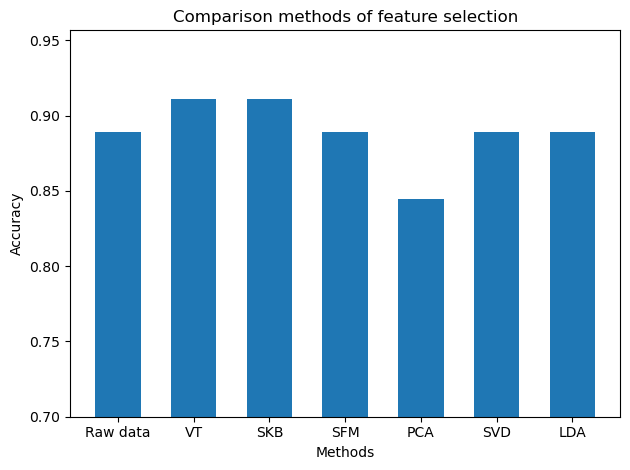

In [318]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(sharey=True, tight_layout=True)
axs.bar(feature_selection.keys(), feature_selection.values(), width=0.6)
axs.set_ylim(0.7)
axs.set_ylabel('Accuracy')
axs.set_xlabel('Methods')
axs.set_title('Comparison methods of feature selection')

In [324]:
fs = pd.DataFrame(feature_selection.values(), index=feature_selection.keys(), columns=['Accuracy'])
pd.set_option('display.precision',2) 
fs

,Accuracy
Raw data,0.89
VT,0.91
SKB,0.91
SFM,0.89
PCA,0.84
SVD,0.89
LDA,0.89


### Застосування моделі логістичної регресії для класифікації ірисів на даному датасеті дозволяє отримати достатньо високий показник якості моделі. Але в деяких випадках показник якості можливо покращити. Наприклад, при застосуванні методів фільтрації даних Variance Treshold і Select K Best.